In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [2]:
Accident  = pd.read_csv('datasets\\accident_data.csv')
Accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
Accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
Accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>Filling up Null Values</h1>

In [5]:
Accident['Latitude'] = Accident['Latitude'].fillna(Accident['Latitude'].mode()[0])

In [6]:
Accident['Longitude'] = Accident['Longitude'].fillna(Accident['Longitude'].mode()[0])

In [7]:
Accident['Urban_or_Rural_Area'] = Accident['Urban_or_Rural_Area'].fillna(Accident['Urban_or_Rural_Area'].mode()[0])

In [8]:
Accident['Road_Surface_Conditions'] = Accident['Road_Surface_Conditions'].fillna(Accident['Road_Surface_Conditions'].mode()[0])

In [9]:
Accident['Road_Type'] = Accident['Road_Type'].fillna('unknown')

In [10]:
Accident['Weather_Conditions'] = Accident['Weather_Conditions'].fillna('unaccounted')

In [11]:
Accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Data Types</h1>

In [12]:
Accident['Accident_Severity'] = Accident['Accident_Severity'].astype('category')

In [13]:
Accident['Accident Date'] = pd.to_datetime(Accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [14]:
Accident['Light_Conditions'] = Accident['Light_Conditions'].astype('category')

In [15]:
Accident['District Area'] = Accident['District Area'].astype('category')

In [16]:
Accident['Road_Surface_Conditions'] = Accident['Road_Surface_Conditions'].astype('category')

In [17]:
Accident['Road_Type'] = Accident['Road_Type'].astype('category')

In [18]:
Accident['Urban_or_Rural_Area'] = Accident['Urban_or_Rural_Area'].astype('category')

In [19]:
Accident['Weather_Conditions'] = Accident['Weather_Conditions'].astype('category')

In [20]:
Accident['Vehicle_Type'] = Accident['Vehicle_Type'].astype('category')

In [21]:
Accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>Extracting date information using pandas date time</h1>

In [22]:
Accident['Year'] = Accident['Accident Date'].dt.year
Accident['Month'] = Accident['Accident Date'].dt.month
Accident['Day'] = Accident['Accident Date'].dt.day
Accident['DayOfWeek'] = Accident['Accident Date'].dt.dayofweek #Monday=0, Sunday=6

<h3>Question:</h3>
<h2>What is the distribution of accident severity levels in the dataset?</h2>

In [23]:
Accident['Accident_Severity'].value_counts(normalize=True)

Accident_Severity
Slight     0.853366
Serious    0.133525
Fatal      0.013109
Name: proportion, dtype: float64

<h1>Severity by Year</h1>

In [24]:
Sy = Accident.groupby(['Year', 'Accident_Severity']).size().unstack(fill_value=0)
Sy

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019.0,1116,9823,60928
2020.0,942,9346,59875
2021.0,823,8858,56491
2022.0,623,7266,48916


In [25]:
severityPYear = Sy.div(Sy.sum(axis=1), axis=0) * 100
severityPYear

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019.0,1.552868,13.668304,84.778828
2020.0,1.342588,13.320411,85.337001
2021.0,1.243728,13.386327,85.369945
2022.0,1.096734,12.791128,86.112138


In [26]:
mostfreqSeverity = severityPYear.idxmax(axis=1)
mostfreqSeverity 

Year
2019.0    Slight
2020.0    Slight
2021.0    Slight
2022.0    Slight
dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']

<h1>Insight1</h1>
<h2>The most frequent accident severity level is Slight, representing approximately 85.3366%</h2>

<h3>Question:</h3>
<h2>If the most frequent accident severity level is Slight, Does it change every year?</h2>

In [27]:
isSlightDominant = (mostfreqSeverity == 'Slight').all()
isSlightDominant

True

<function matplotlib.pyplot.show(close=None, block=None)>

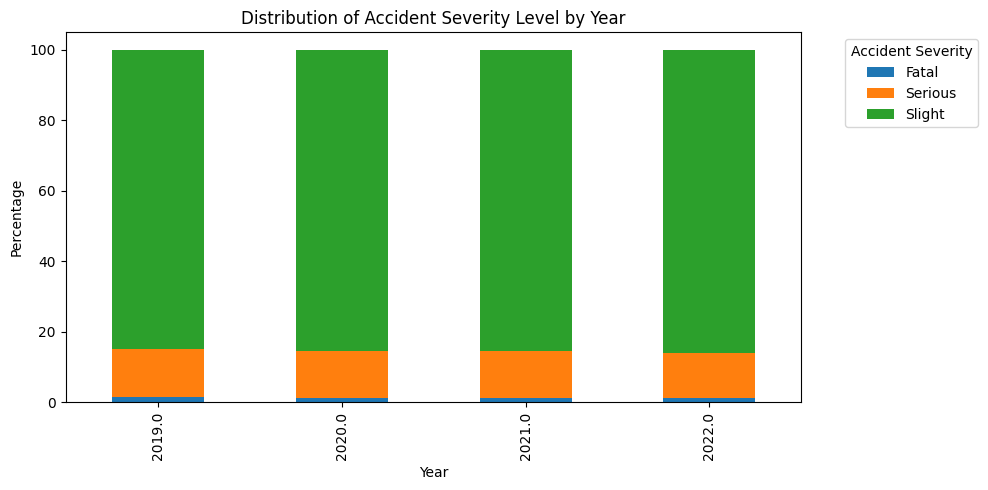

In [28]:
severityPYear.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Distribution of Accident Severity Level by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show

<h1>Insight2</h1>
<h2>The most Frequent accident severity level is consistently "Slight" across all years. So it does not change every year; it remains "Slight" as the most frequent severity level for all years.</h2>

<h1>Insight3</h1>
<h2>The "Slight" severity level is consistent so it means that most accidents tend to result in minor injuries or damages. If this were to change in the future then it means an increase in serious or fatal accidents and could signal a need for immediate intervention</h2>

<h3>Question:</h3>
<h2>Are there specific dates with unusually high accident frequencies?</h2>

In [29]:
accidents_per_date = Accident.groupby('Accident Date').size().reset_index(name='Accident Count')
accidents_per_date

,Accident Date,Accident Count
0,2019-01-01,335
1,2019-01-02,370
2,2019-01-03,397
3,2019-01-04,405
4,2019-01-05,445
...,...,...
571,2022-12-08,390
572,2022-12-09,444
573,2022-12-10,412
574,2022-12-11,378


In [30]:
average_accidents = accidents_per_date['Accident Count'].mean() # average
average_accidents

460.08159722222223

<h1>Insight 4</h1>
<h2>There are 460.08 average accidents per Day</h2>

In [31]:
std_accidents = accidents_per_date['Accident Count'].std() # standard deviation
std_accidents 

94.04653024994138

In [32]:
threshold = average_accidents + 2 * std_accidents 
threshold

#any Day with more than approximately of the threshold is considered unusually high

648.1746577221049

In [33]:
unusual_dates = accidents_per_date[accidents_per_date['Accident Count'] > threshold]
unusual_dates

,Accident Date,Accident Count
12,2019-02-01,676
13,2019-02-02,652
112,2019-10-05,657
137,2019-12-06,678
142,2019-12-11,653
143,2019-12-12,655
310,2021-02-11,685
401,2021-10-06,680
419,2021-11-12,659
423,2021-12-04,667


<h1>Insight 5</h1>
<h2> The specific dates with unusually high accident frequencies are listed above from 2019 to 2022 </h2>

<h3>Counting the accidents happen from the weather conditions</h3>

In [34]:
weather_counts = Accident['Weather_Conditions'].value_counts()
weather_counts

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h1>Insight 6</h1>
<h2> most accident happens during fine no high winds of weather conditions meaning except for fine and no high winds theres another factor affecting the accidents happen, and not depending on other weather conditions. But Understanding this factor can help people to inform and may reduce accident rates in the future.</h2>

<h3>Counting the accidents happen from the Light conditions</h3>

In [35]:
light_counts = Accident['Light_Conditions'].value_counts()
light_counts

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1>Insight 7</h1>
<h2> most accident happens during Daylight. And understanding this factor can help people to inform and may reduce accident by addressing some factors or issues during Daylight to reduce accident rates in the future.</h2>

<h3>Counting the accidents happen from the Road surface conditions</h3>

In [36]:
road_surface_counts = Accident['Road_Surface_Conditions'].value_counts()
road_surface_counts

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h1>Insight 8</h1>
<h2> most accident happens when the Road surface is Dry which means that except for the Daylight there can be another factor like environmental factors affecting why the accident happens. But Understanding this factor can help people to inform and may reduce accident rates in the future.</h2>

In [37]:
Accident['District Area']

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: category
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

<h3>Question:</h3>
<h2>What District Area does the accident is more likely to happen?</h2>

In [38]:
Distcount = Accident['District Area'].value_counts()
Distcount

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h1>Insight 9</h1>
<h2>The accident is more likely to happen in the Birmingham Area</h2>

In [39]:
Accident.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Year,Month,Day,DayOfWeek
count,265007,660679.000000,660679.000000,660679.000000,660679.000000,265007.000000,265007.000000,265007.000000,265007.000000
mean,2020-11-23 16:22:04.873683456,52.553862,-1.431193,1.357040,1.831255,2020.407216,6.708374,6.522028,3.106367
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000,2019.000000,1.000000,1.000000,0.000000
25%,2019-12-03 00:00:00,51.490696,-2.332191,1.000000,1.000000,2019.000000,4.000000,4.000000,1.000000
50%,2020-11-07 00:00:00,52.315755,-1.411613,1.000000,2.000000,2020.000000,7.000000,7.000000,3.000000
75%,2021-11-07 00:00:00,53.453444,-0.232901,1.000000,2.000000,2021.000000,10.000000,10.000000,5.000000
max,2022-12-12 00:00:00,60.757544,1.762010,68.000000,32.000000,2022.000000,12.000000,12.000000,6.000000
std,NaN,1.406896,1.383305,0.824847,0.715269,1.101126,3.445617,3.467063,1.920114


<h3>Question:</h3>
<h2>Is there a correlation between the latitude and the location of the most prone accident, Birmingham?</h2>

In [40]:
birmingham_data = Accident[Accident['District Area'] == 'Birmingham']
birmingham_data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
68519,200720D003001,Slight,2019-01-02,52.513668,Darkness - lights lit,Birmingham,-1.901975,1,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2019.0,1.0,2.0,2.0
68520,200720D003101,Slight,2019-01-02,52.502396,Daylight,Birmingham,-1.867086,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,1.0,2.0,2.0
68521,200720D003802,Serious,2019-01-03,52.563201,Daylight,Birmingham,-1.822793,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,1.0,3.0,3.0
68522,200720D005801,Slight,2019-01-02,52.493431,Daylight,Birmingham,-1.818507,1,2,Wet or damp,Dual carriageway,Urban,unaccounted,Car,2019.0,1.0,2.0,2.0
68523,200720D005901,Slight,2019-01-05,52.510805,Darkness - lights lit,Birmingham,-1.834202,1,3,Dry,Dual carriageway,Urban,Fine no high winds,Car,2019.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583759,201020Z500110,Slight,NaT,52.506095,Darkness - lights lit,Birmingham,-1.878861,1,2,Snow,Single carriageway,Urban,Snowing no high winds,Car,NaN,NaN,NaN,NaN
583760,201020Z500120,Slight,NaT,52.514554,Darkness - lights lit,Birmingham,-1.765076,1,2,Frost or ice,Dual carriageway,Rural,Snowing no high winds,Car,NaN,NaN,NaN,NaN
583761,201020Z500140,Slight,NaT,52.507630,Darkness - lights lit,Birmingham,-1.814913,2,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,NaN,NaN,NaN,NaN
583766,201020Z620211,Slight,NaT,52.509143,Darkness - lights lit,Birmingham,-1.871043,2,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Taxi/Private hire car,NaN,NaN,NaN,NaN


In [41]:
accident_counts = birmingham_data.groupby('Latitude').size()
accident_counts

Latitude
52.384250    1
52.384969    1
52.385149    4
52.385598    1
52.385867    1
            ..
52.599106    1
52.601288    1
52.602609    1
52.606644    1
52.607004    1
Length: 8844, dtype: int64

<h1>Insight 10</h1>
<h2>The fact that there are multiple accidents (4 in this case) at the same latitude suggests that this location could be a hotspot for accidents</h2>

In [42]:
# Filter data for accidents at the specified latitude
latitude_filter = 52.385149
latitudefltrd = Accident[Accident['Latitude'] == latitude_filter]
latitudefltrd 

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
70343,200720E065801,Serious,NaT,52.385149,Daylight,Birmingham,-2.001877,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Goods over 3.5t. and under 7.5t,NaN,NaN,NaN,NaN
70770,200720E132901,Slight,2019-10-03,52.385149,Daylight,Birmingham,-2.001877,2,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2019.0,10.0,3.0,3.0
249563,200820E047701,Slight,NaT,52.385149,Darkness - lights lit,Birmingham,-2.001877,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Goods 7.5 tonnes mgw and over,NaN,NaN,NaN,NaN
582202,201020S053310,Slight,2022-12-10,52.385149,Darkness - lights lit,Birmingham,-2.001877,1,2,Wet or damp,Dual carriageway,Urban,Other,Car,2022.0,12.0,10.0,5.0


In [43]:
# Groupby road type and road condition to analyze accident counts
road_type_condition = latitudefltrd.groupby(['Road_Type', 'Road_Surface_Conditions']).size()
road_type_condition

Road_Type           Road_Surface_Conditions
Dual carriageway    Dry                        1
                    Flood over 3cm. deep       0
                    Frost or ice               0
                    Snow                       0
                    Wet or damp                2
One way street      Dry                        0
                    Flood over 3cm. deep       0
                    Frost or ice               0
                    Snow                       0
                    Wet or damp                0
Roundabout          Dry                        0
                    Flood over 3cm. deep       0
                    Frost or ice               0
                    Snow                       0
                    Wet or damp                0
Single carriageway  Dry                        0
                    Flood over 3cm. deep       0
                    Frost or ice               0
                    Snow                       0
                    Wet o

In [44]:
result = road_type_condition.reset_index(name='Accident_Count')
result

,Road_Type,Road_Surface_Conditions,Accident_Count
0,Dual carriageway,Dry,1
1,Dual carriageway,Flood over 3cm. deep,0
2,Dual carriageway,Frost or ice,0
3,Dual carriageway,Snow,0
4,Dual carriageway,Wet or damp,2
5,One way street,Dry,0
6,One way street,Flood over 3cm. deep,0
7,One way street,Frost or ice,0
8,One way street,Snow,0
9,One way street,Wet or damp,0


<h1>Insight 11</h1>
<h2>The analysis supports the idea that latitude 52.385149 could be a hotspot for accidents, particularly due to the influence of road surface conditions (wet or damp)</h2>

<h3>Question:</h3>
<h1>To analyze the temporal patterns of accidents at latitude 52.385149. Are there any trends  in when accidents occur?</h1>

In [45]:
accidents_per_day = latitudefltrd.groupby('Day').size()
accidents_per_day

Day
3.0     1
10.0    1
dtype: int64

<h1>Insight 12</h1>
<h2>I found out that Accidents occurred on only two specific days of the month: the 3rd and the 10th. This limited distribution suggests that accidents at this latitude do not occur frequently throughout the month.</h2>

In [46]:
accidents_per_day_of_week = latitudefltrd.groupby('DayOfWeek').size()
accidents_per_day_of_week

DayOfWeek
3.0    1
5.0    1
dtype: int64

<h1>Insight 13</h1>
<h2>I found out that accidents were recorded on two days of the week: Wednesday (Day 3) and Friday (Day 5). This indicates that accidents may be more likely to occur mid-week and at the end of the workweek.</h2>

In [47]:
accidents_per_month = latitudefltrd.groupby('Month').size()
accidents_per_month

Month
10.0    1
12.0    1
dtype: int64

<h1>Insight 14</h1>
<h2>I found out that accidents occurred in two months: October (Month 10) and December (Month 12). This indicates potential seasonal influences, where there might be more accidents in certain months.</h2>

In [48]:
accidents_per_year = latitudefltrd.groupby('Year').size()
accidents_per_year

Year
2019.0    1
2022.0    1
dtype: int64

<h1>Insight 15</h1>
<h2>I found out that accidents were recorded in two different years: 2019 and 2022. This suggests that while accidents do occur, they may not be a consistent or frequent issue over time at this specific latitude.
</h2>

<h3>Question: </h3>
<h1>What is the severity of the accidents occured in the Latitude52.385149</h1>

In [49]:
severity_counts = latitudefltrd.groupby('Accident_Severity').size()
severity_counts

Accident_Severity
Fatal      0
Serious    1
Slight     3
dtype: int64

<h1>Insight 16</h1>
<h2>At latitude 52.385149, the analysis of accident severity reveals no fatal accidents, one serious accident, and three slight accidents. This indicates that while accidents do occur in this area, they are generally not severe. </h2>

<h3>continuation..</h3>

In [51]:
correlation = birmingham_data['Latitude'].corr(birmingham_data['Number_of_Casualties'])
print(f"Correlation between Latitude and Number of Casualties: {correlation}")

Correlation between Latitude and Number of Casualties: 0.008788440104652023


<h1>Insight 17</h1>
<h2>A correlation coefficient of approximately -0.0317 between latitude and accident frequency in Birmingham, indicates no significant correlation</h2>

<h3>Confirming if the Birmingham is Urban or Rural</h3>

In [ ]:
Accident[['District Area', 'Urban_or_Rural_Area']].value_counts()

<h1>Insight 18</h1>
<h2>Birmingham, as a densely populated urban area, experiences accident frequency influenced more by factors like traffic volume, road conditions, and driver behavior than geographic factors like latitude. My analysis shows that accidents are more prevalent in Birmingham, particularly under wet or damp conditions, emphasizing the need to address urban traffic dynamics and environmental factors to improve road safety</h2>

<h3>Question: </h3>
<h2>How does the vehicle type involved correlate with the severity of accidents? Are certain vehicle types more prone to severe accidents?</h2>

In [ ]:
Accident['Vehicle_Type'].value_counts

In [ ]:
filtered_data = Accident[(Accident['Vehicle_Type'] != 'Data missing or out of range') & 
                   (Accident['Accident_Severity'].notnull())]

filtered_data

In [ ]:
severity_by_vehicle = filtered_data.groupby(['Vehicle_Type', 'Accident_Severity']).size()
severity_by_vehicle

In [ ]:
severity_analysis = severity_by_vehicle.reset_index(name='Accident_Count')
severity_analysis

In [ ]:
severity_pivot = severity_analysis.pivot(index='Vehicle_Type', columns='Accident_Severity', values='Accident_Count').fillna(0) 
severity_pivot

In [ ]:
severity_pivot['Total_Accidents'] = severity_pivot.sum(axis=1)
severity_pivot

In [ ]:
severity_pivot['Severe_Accidents'] = severity_pivot.get('Serious', 0) + severity_pivot.get('Fatal', 0)
severity_pivot['Severe_Proportion'] = severity_pivot['Severe_Accidents'] / severity_pivot['Total_Accidents']

In [ ]:
severity_pivot['Severe_Accidents']

<h1>Insight 19</h1>
<h2>The analysis of severe accidents reveals that the Car category has the highest number of severe accidents, totaling 73,038, followed by Bus or coach (17 or more passenger seats) with 3,698 and Van / Goods 3.5 tonnes mgw or under with 5,021. </h2>

In [ ]:
severity_pivot['Severe_Proportion']

<h1>Insight 20</h1>
<h2>The Pedal cycle category stands out with the highest proportion of severe accidents at approximately 11.42%, indicating that cyclists may face a higher risk of severe outcomes in accidents compared to other vehicle types. Conversely, the proportion of severe accidents for vehicles like Agricultural vehicles, Buses, and Cars ranges from about 7.14% to 7.78%, suggesting that while these vehicles are involved in many accidents, the severity is not disproportionately high relative to their accident counts.</h2>

<h3>Question:</h3>
<h1>How does the number of accidents vary by month?</h1>

In [53]:
# Create a dictionary mapping month numbers to month names
month_dict = {
    1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'
}

# Use the dictionary to convert month numbers to names
accidents_per_month = Accident.groupby('Month').size()

# Convert month numbers to names
accidents_per_month_named = accidents_per_month.rename(index=month_dict)

accidents_per_month_named


Month
January      18252
February     22264
March        21824
April        19787
May          21723
June         22196
July         22939
August       21106
September    22558
October      23962
November     24240
December     24156
dtype: int64

In [54]:
accidents_per_month = Accident.groupby('Month').size().reset_index(name='Counts')
accidents_per_month

,Month,Counts
0,1.0,18252
1,2.0,22264
2,3.0,21824
3,4.0,19787
4,5.0,21723
5,6.0,22196
6,7.0,22939
7,8.0,21106
8,9.0,22558
9,10.0,23962


<h1>Insight 21</h1>
<h2>Accidents occur most frequently in the months of November and December, with October also being a peak month, suggesting a seasonal increase in accident rates during these periods.</h2>